In [1]:
import pandas as pd
import numpy as np
archivo_tseca = 'datos_temp_seca.csv'
datos_tseca = pd.read_csv(archivo_tseca)
df_tseca = pd.DataFrame(datos_tseca)
df_tseca

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 07:00,19.4,50,NaN,900
1,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 13:00,26.6,50,NaN,900
2,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-01 19:00,23.6,50,NaN,900
3,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-02 07:00,19.6,50,NaN,900
4,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,1983-02-02 13:00,27.0,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36473,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-30 13:00,26.6,50,NaN,900
36474,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-30 19:00,25.7,50,NaN,900
36475,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-31 07:00,19.8,50,NaN,900
36476,26135040,AEROPUERTO MATECANA [26135040],4.815861,-75.737222,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,TEMPERATURA,TSSM_CON,"Temperatura seca de las 700, 1300 y 1800",Horaria,2020-01-31 13:00,26.8,50,NaN,900


In [3]:
campos = ['Fecha', 'Valor']
new_tseca = df_tseca[campos].copy()
new_tseca['Fecha'] = pd.to_datetime(new_tseca['Fecha'])
new_tseca

,Fecha,Valor
0,1983-02-01 07:00:00,19.4
1,1983-02-01 13:00:00,26.6
2,1983-02-01 19:00:00,23.6
3,1983-02-02 07:00:00,19.6
4,1983-02-02 13:00:00,27.0
...,...,...
36473,2020-01-30 13:00:00,26.6
36474,2020-01-30 19:00:00,25.7
36475,2020-01-31 07:00:00,19.8
36476,2020-01-31 13:00:00,26.8


In [4]:
new_tseca.loc[:, 'Dia'] = new_tseca['Fecha'].dt.date #Extraigo la fecha sin hora en una nueva columna
new_tseca

diaria_tseca = new_tseca.groupby('Dia').agg(
    Temperatura_Promedio=('Valor', 'mean')  # Calcula el promedio diario
).reset_index()

diaria_tseca.rename(columns={'Dia': 'Fecha'}, inplace=True)
diaria_tseca['Fecha'] = pd.to_datetime(diaria_tseca['Fecha']) #Convierto la fecha en tipo datetime

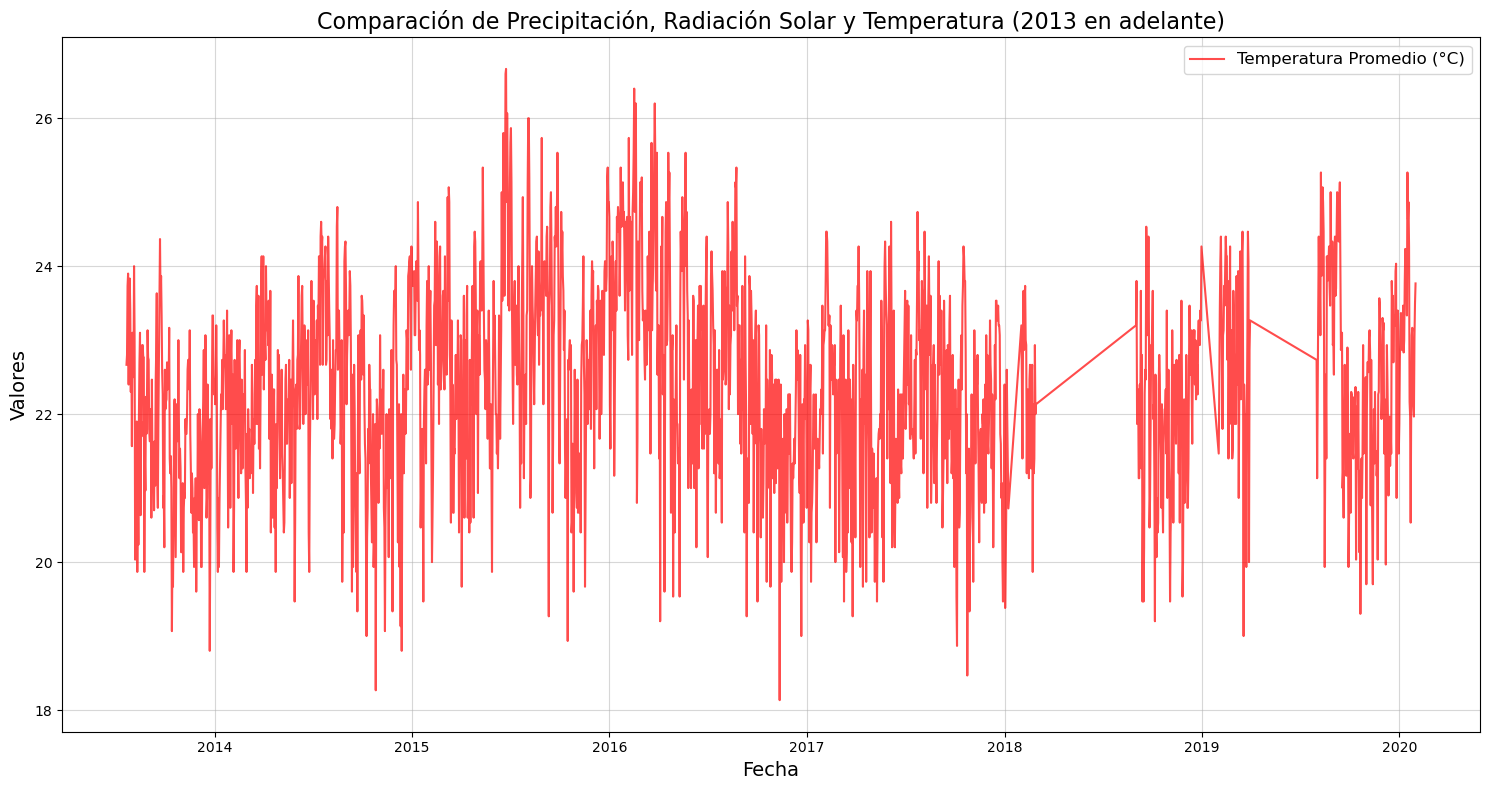

In [5]:
import matplotlib.pyplot as plt

# Gráfico de líneas
fecha_inicio = '2013-07-22'
fecha_inicio = pd.to_datetime(fecha_inicio) 

# Sólo gráficaremos después de fecha_inicio
tseca_filtered = diaria_tseca[diaria_tseca['Fecha'] >= fecha_inicio].copy()

plt.figure(figsize=(15, 8)) #Tamaño del gráfico

# Grafica cada variable
plt.plot(tseca_filtered['Fecha'], tseca_filtered['Temperatura_Promedio'], label='Temperatura Promedio (°C)', color='red', alpha=0.7)

# Etiquetas de los ejes y titulo
plt.title(f'Comparación de Precipitación, Radiación Solar y Temperatura ({fecha_inicio.year} en adelante)', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [ ]:
# Gráfico de barras (opcional para comparación)
plt.figure(figsize=(15, 6))
plt.bar(ndf['Fecha'], ndf['Valor'], color='skyblue', alpha=0.7, label='Lluvia diaria')
plt.title('Cantidad de lluvia diaria en Pereira', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Filtrar por un año específico (ejemplo: 2018)
year = 2017
filtered_df = ndf[ndf['Fecha'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
plt.bar(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Temperatura promedio por dia en Pereira: {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
year = 2017
filtered_df = ndf[ndf['Fecha'].apply(lambda x: x.year) == year]

# Graficar en barras
plt.figure(figsize=(15, 6))
plt.bar(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
# plt.plot(filtered_df['Fecha'], filtered_df['Valor'], color='blue', alpha=0.7, label=f'Lluvia diaria en {year}')
plt.title(f'Temperatura promedio por dia en Pereira: {year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
# Filtrar por año y mes específicos (ejemplo: agosto de 2018)
year = 2018
month = 4
filtered_df = ndf[(ndf['Fecha'].apply(lambda x: x.year) == year) & (ndf['Fecha'].apply(lambda x: x.month) == month)]

# Graficar
plt.figure(figsize=(15, 6))
# plt.bar(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.plot(filtered_df['Fecha'], filtered_df['Valor'], label=f'Lluvia diaria en {month}/{year}', color='green', alpha=0.7)
plt.title(f'Temperatura promedio por dia en Pereira: {month}/{year}', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Lluvia (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()